# Recommending Restaurants: Tailored Culinary Recommendations through NLP

### Introduction
The project "Recommending Restaurants: Tailored Culinary Recommendations through NLP" introduces a novel approach to enhancing the dining experience by integrating advanced Natural Language Processing (NLP) techniques. It is rooted in the concept of TasteMatch, an application designed to help users discover their next favorite restaurant. The app capitalizes on the power of NLP and Word2Vec algorithms to analyze restaurant reviews across the United States, providing personalized and relevant dining suggestions.

### Problem Statement
Choosing a new restaurant can be a gamble, often leading to hesitation and a fallback to familiar choices. This hesitancy stems from the fear of an unsatisfactory dining experience, overshadowing the excitement of discovering new culinary delights. The primary challenge this project addresses is the uncertainty and limited exposure in selecting restaurants. There is a clear need for a system that can accurately understand and match individual dining preferences with potential restaurant options, based on a comprehensive analysis of existing user reviews and experiences.

### Development Method
The development of TasteMatch followed a strategic approach focused on leveraging NLP techniques:

1. **Data Collection and Preprocessing**: Gathered extensive restaurant reviews from across the US. The data was cleaned and preprocessed to ensure quality and consistency for NLP tasks.

2. **NLP and Word2Vec Implementation**: Applied NLP techniques to analyze the semantic content of the reviews. The Word2Vec model was used to convert text data into vector space, capturing the nuances of human language and sentiments expressed in the reviews.

3. **Similarity Calculation**: Used Scikit-Learn's similarity function to calculate the similarity between restaurants based on the Word2Vec representations of their reviews. This similarity metric forms the basis for recommending restaurants to users.

4. **Personalized Recommendations**: Integrated the model into the TasteMatch app, allowing users to select a known restaurant and receive a curated list of similar restaurants. The recommendations are tailored to align with the user's preferences and past dining experiences, as inferred from the review analysis.

5. **User Interface and Experience**: Focused on creating an intuitive and user-friendly interface for TasteMatch, enabling easy navigation and a seamless experience for discovering new restaurants.

The project successfully merges NLP's analytical capabilities with practical application in the culinary domain, offering a unique solution that not only broadens the user's gastronomic horizons but also does so with a high degree of personalization and relevance.

### Import packages

In [13]:
import pandas as pd
import gensim
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')


### Preprocessing Restaurant Reviews: Data Cleaning for NLP

This section is dedicated to preprocessing restaurant reviews, an essential step before performing Natural Language Processing (NLP) tasks. The script begins by loading a dataset containing various attributes of restaurants, including their names, categories, ratings, and reviews. It focuses on refining the 'reviews' column through a series of text cleaning steps:

1. **Lowercasing Reviews**: Converts all reviews to lowercase for uniformity.

2. **Removing Non-Letter Characters**: Eliminates any characters in the reviews that are not letters, ensuring that only textual data is retained.

3. **Punctuation Removal**: Strips off punctuation from the reviews, as these characters are often irrelevant for NLP analysis.

4. **Stopwords Removal**: Filters out common English stopwords using the NLTK library. This step is crucial for reducing noise and focusing on the meaningful content in the reviews.

5. **URL Removal**: Clears any web links present in the reviews, as URLs generally do not contribute to understanding the sentiment or content of the review.

The end result is a cleaned and simplified version of the reviews, which is more suitable for subsequent NLP, in our case the word embeddings. This preprocessing phase is vital for obtaining accurate and insightful results in any NLP-driven analysis of restaurant reviews.

In [ ]:
data = pd.read_csv("master_data.csv")

In [14]:
data = data[['id','name','categories','rating','reviews']]

In [15]:
data['reviews'] = data['reviews'].str.lower()

In [16]:
def remove_non_letters(text):
    return re.sub(r'[^a-zA-Z\s]', '', str(text))

data["reviews"] = data["reviews"].apply(remove_non_letters)

In [17]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["reviews"] = data["reviews"].apply(lambda text: remove_punctuation(text))

In [18]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in STOPWORDS]
    return " ".join(filtered_words)


data["reviews"] = data["reviews"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sathish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

data["reviews"] = data["reviews"].apply(lambda text: remove_urls(text))

In [20]:
data[['categories','reviews']]

,categories,reviews
0,"Salad, Burgers, Sandwiches",sports bar upscale food environment good servi...
1,"Middle Eastern, Desserts, Halal",place deserves stars delicious good portions f...
2,"American, Sports Bars",food good service great even though incredibly...
3,Ramen,yall feel ramen weather perfect day check hot ...
4,"Cajun/Creole, Seafood",visited classic weekend friends course busy st...
...,...,...
60968,Grocery,shopping pharmacy great food court best afford...
60969,Coffee & Tea,place cute amazing pumpkin spice latte october...
60970,Coffee & Tea,iced coffeein novemberwhen degrees understand ...
60971,"Gas Stations, Convenience Stores",looks brand new loves facility easy back good ...


### Advanced NLP Analysis: Training and Visualizing Word2Vec Models for Restaurant Reviews

This section provides a comprehensive NLP workflow for training and evaluating Word2Vec models on restaurant reviews. The process involves several key steps:

1. **Tokenization of Reviews**: The reviews are tokenized into words, and the dataset is split into training and validation sets.

2. **Training Word2Vec Models**: Two types of Word2Vec models, Continuous Bag of Words (CBOW) and Skip-gram, are trained on the reviews. Additionally, a pre-trained model is configured for comparison. The Word2Vec models are trained to transform words into meaningful vector representations.

3. **Vectorization of Reviews**: A function `vectorize_review` is defined to convert reviews into vectors using the trained Word2Vec models. This involves averaging the word vectors in a review to create a single vector representation for each review.

4. **Model Evaluation**: The models are evaluated using cosine similarity on the validation set. The average similarity scores for CBOW and Skip-gram models are compared to determine the best performing model.

5. **Model Selection and Saving**: The script identifies and saves the best performing model (either CBOW or Skip-gram) based on the evaluation scores.

6. **Feature Extraction for Reviews**: The best Word2Vec model is used to vectorize all reviews in the dataset, creating a feature set that can be used for further analysis or machine learning tasks.

7. **Visualization of Word Vectors**: The word vectors from the trained models are visualized using t-SNE, a technique for dimensionality reduction. This visualization helps in understanding the relationships and clusters among words in the vector space.

8. **Visualizing Word Vectors for Each Model**: Separate visualizations are created for the CBOW model, the Skip-gram model, and the pre-trained model. These visualizations provide insights into the different semantic and syntactic relationships captured by each model.

This script showcases the power of Word2Vec models in extracting meaningful patterns from text data and the utility of these models in understanding natural language content, particularly in the context of restaurant reviews.

In [8]:
!pip install gensim

Best model is skipgram_model with score: 0.9613266587257385
Pretained score is: 0.47096574306488037


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Pyt

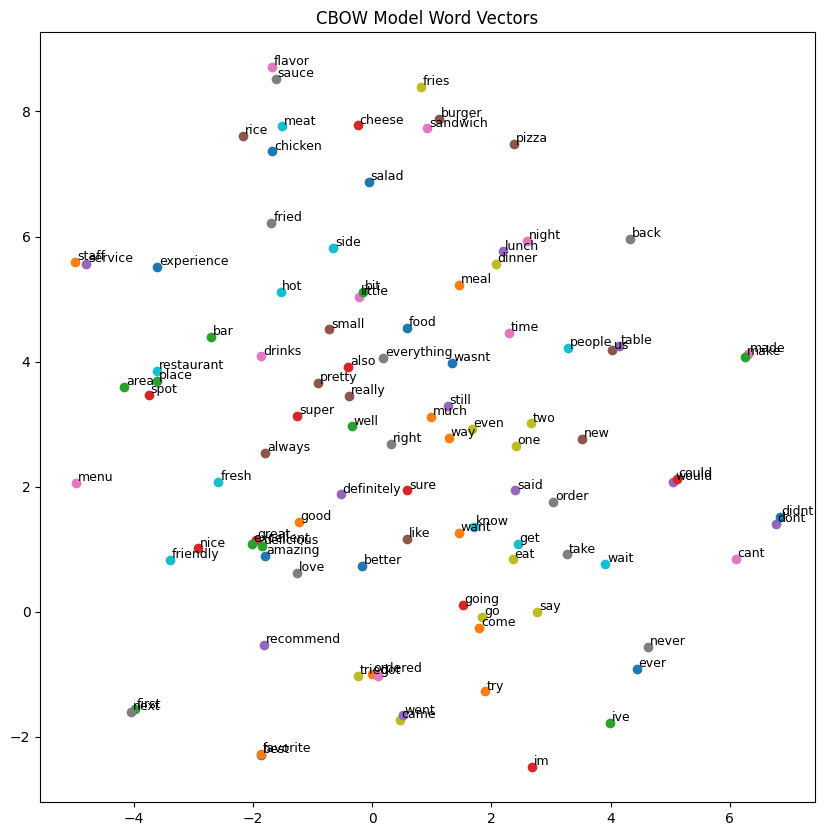

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Pyt

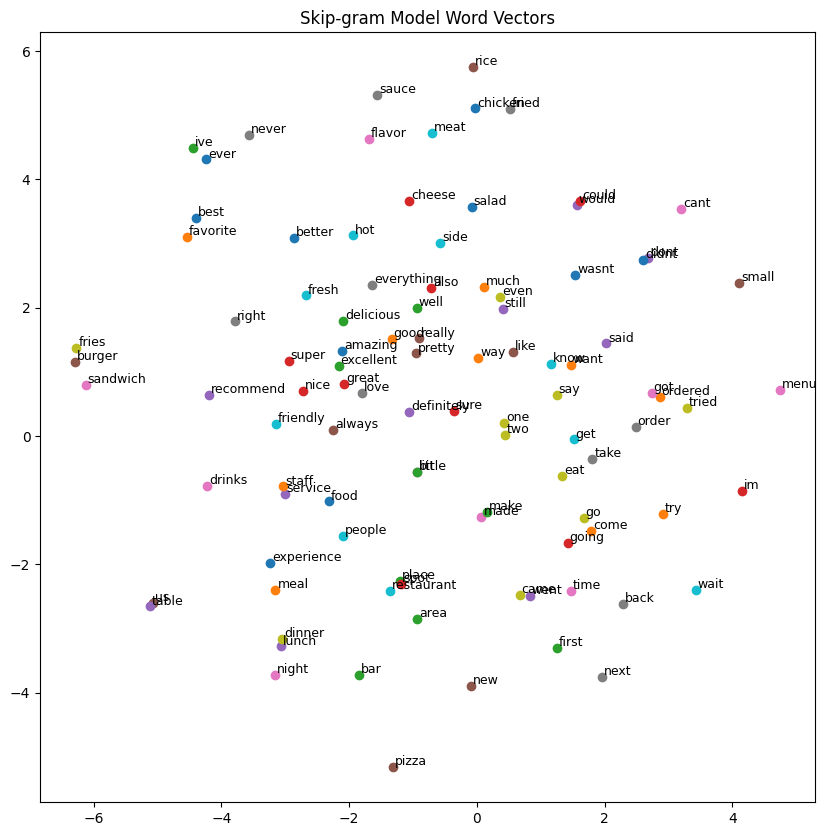

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Pyt

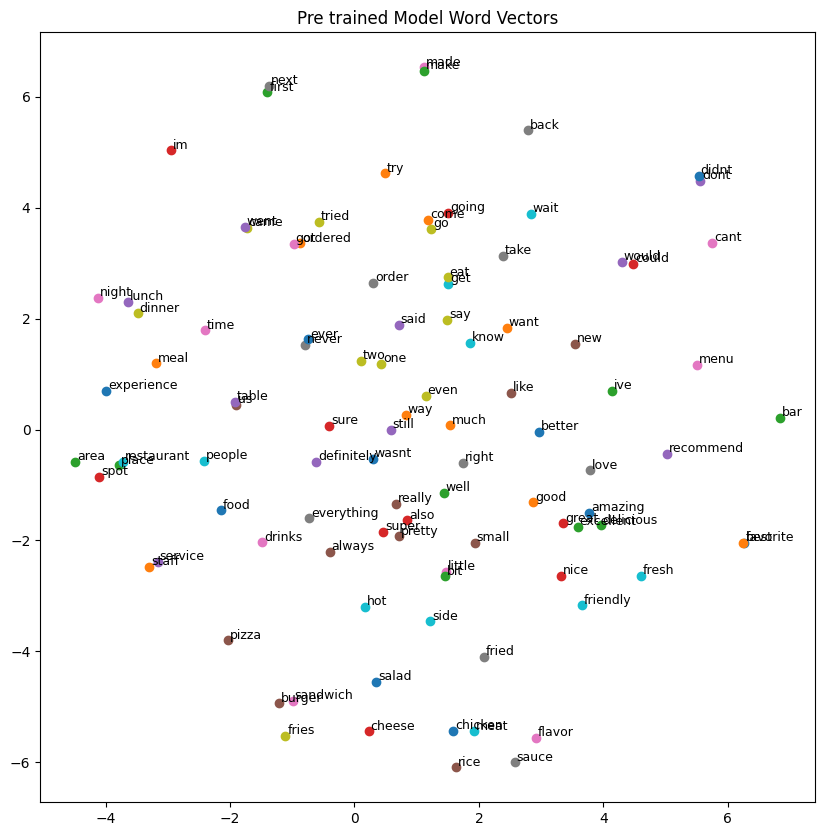

In [21]:
tokenized_reviews = [word_tokenize(review.lower()) for review in data["reviews"].tolist()]


train_reviews, validation_reviews = train_test_split(tokenized_reviews, test_size=0.2, random_state=42)

def train_word2vec(sentences, sg):
    return gensim.models.Word2Vec(sentences=sentences, vector_size=150, window=5, workers=4, min_count=2, sg=sg, epochs=10)


cbow_model = train_word2vec(train_reviews, sg=0)
skipgram_model = train_word2vec(train_reviews, sg=1)
model = gensim.models.Word2Vec(sentences=train_reviews, vector_size=150, window=5, workers=4, min_count=5)

def vectorize_review(review, model):
    vec = []
    for word in word_tokenize(review.lower()):
        if word in model.wv:
            word_vec = model.wv[word]
            vec.append(word_vec)

    if vec:
        vec = np.array(vec)
        vec = normalize(vec, axis=1, norm='l2')
        vec = np.mean(vec, axis=0)
    else:
        vec = np.zeros(model.vector_size)

    return vec


def evaluate_model(model, validation_reviews):
    validation_vectors = np.array([vectorize_review(' '.join(review), model) for review in validation_reviews])
    similarities = cosine_similarity(validation_vectors)
    # Return the average of the off-diagonal elements in the similarity matrix
    return np.mean(similarities[np.triu_indices_from(similarities, k=1)])


cbow_score = evaluate_model(cbow_model, validation_reviews)
skipgram_score = evaluate_model(skipgram_model, validation_reviews)
pretrained_score = evaluate_model(model, validation_reviews)


best_model = cbow_model if cbow_score > skipgram_score else skipgram_model
model_name = 'cbow_model' if cbow_score > skipgram_score else 'skipgram_model'
print(f"Best model is {model_name} with score: {max(cbow_score, skipgram_score)}")
print(f"Pretained score is: {pretrained_score}")


best_model.save(f"{model_name}.model")


loaded_model = gensim.models.Word2Vec.load(f"{model_name}.model")


features = np.array([vectorize_review(review, loaded_model) for review in data["reviews"].tolist()])


np.save("best_word2vec_features.npy", features)


def visualize_word_vectors(model, title):
    words = list(model.wv.index_to_key)[:100]
    word_vectors = np.array([model.wv[word] for word in words])

    tsne = TSNE(n_components=2, random_state=0)
    vectors_2d = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words):
        plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
        plt.text(vectors_2d[i, 0]+0.03, vectors_2d[i, 1]+0.03, word, fontsize=9)
    plt.title(title)
    plt.show()

visualize_word_vectors(cbow_model, 'CBOW Model Word Vectors')
visualize_word_vectors(skipgram_model, 'Skip-gram Model Word Vectors')
visualize_word_vectors(model, 'Pre trained Model Word Vectors')

In [22]:
cbow_score

0.3789508

### Finalizing the NLP Pipeline: Similarity Calculation and Streamlit App Deployment


1. **Similarity Calculations**: Building on the Word2Vec features, the script in `app.py` includes algorithms for calculating similarity scores between restaurant reviews. These calculations are pivotal in identifying and recommending restaurants with similar customer feedback and preferences.

2. **Streamlit Application Development**: The `app.py` file also encompasses the development of a Streamlit application. This application serves as the interactive interface for the end-users, allowing them to effortlessly explore restaurant recommendations based on their preferences and reviews similarity.

3. **Deployment and Accessibility**: The final step involves deploying the Streamlit app, making the restaurant recommendation tool accessible to users. This deployment not only showcases the practical application of the NLP model but also provides a platform for real-world testing and user feedback.

The completion of these steps represents the practical implementation of the NLP model in a real-world application, bringing the project from concept to a functional tool that enhances the dining experience through personalized recommendations.